## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1,0.25,0.3,0.5]

In [7]:
results = {}
for DD in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (DD))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=DD)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(DD)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0720 14:44:37.731400  5528 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0720 14:44:37.733400  5528 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0720 14:44:37.762399  5528 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 14:44:37.763399  5528 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 14:44:37.765400  5528 

Experiment with Regulizer = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128

Epoch 49/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.1362 - acc: 0.5885 - val_loss: 1.3381 - val_acc: 0.5309
Epoch 50/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.1364 - acc: 0.5900 - val_loss: 1.3502 - val_acc: 0.5354
Experiment with Regulizer = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)    

Epoch 47/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5231 - acc: 0.4523 - val_loss: 1.5101 - val_acc: 0.4759
Epoch 48/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.5219 - acc: 0.4555 - val_loss: 1.4636 - val_acc: 0.4839
Epoch 49/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5173 - acc: 0.4532 - val_loss: 1.4876 - val_acc: 0.4833
Epoch 50/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5189 - acc: 0.4536 - val_loss: 1.4572 - val_acc: 0.4842
Experiment with Regulizer = 0.300000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout

Epoch 45/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5703 - acc: 0.4364 - val_loss: 1.5264 - val_acc: 0.4579
Epoch 46/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5684 - acc: 0.4363 - val_loss: 1.5043 - val_acc: 0.4734
Epoch 47/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5647 - acc: 0.4351 - val_loss: 1.5255 - val_acc: 0.4692
Epoch 48/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.5570 - acc: 0.4388 - val_loss: 1.5421 - val_acc: 0.4613
Epoch 49/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.5597 - acc: 0.4393 - val_loss: 1.5002 - val_acc: 0.4686
Epoch 50/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.5531 - acc: 0.4425 - val_loss: 1.5120 - val_acc: 0.4697
Experiment with Regulizer = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Pa

Epoch 43/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.9552 - acc: 0.2630 - val_loss: 2.0236 - val_acc: 0.2725
Epoch 44/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.9552 - acc: 0.2629 - val_loss: 2.0151 - val_acc: 0.2827
Epoch 45/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.9601 - acc: 0.2603 - val_loss: 2.0570 - val_acc: 0.2470
Epoch 46/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.9548 - acc: 0.2619 - val_loss: 2.0384 - val_acc: 0.2651
Epoch 47/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.9569 - acc: 0.2623 - val_loss: 1.9900 - val_acc: 0.2771
Epoch 48/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.9514 - acc: 0.2652 - val_loss: 2.0329 - val_acc: 0.2665
Epoch 49/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.9574 - acc: 0.2637 - val_loss: 1.9872 - val_acc: 0.2745
Epoch 50/50
50000/50

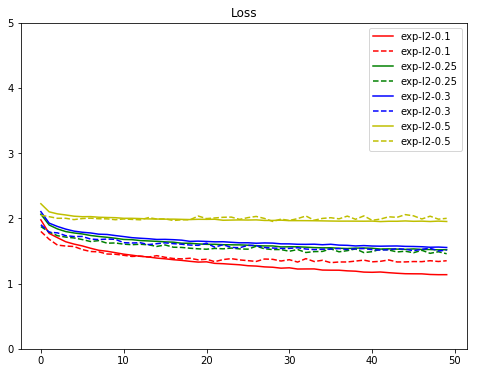

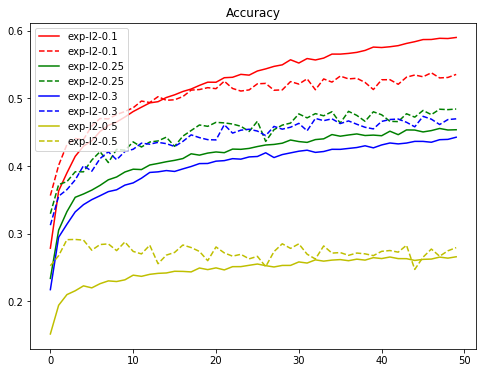

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()